In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataset simulado
data = {
    "Edad": [23, np.nan, 21, np.nan, 25, 19, 18, 20, np.nan, 22],
    "Género": ["F", "M", np.nan, "M", "F", "F", "M", np.nan, "F", "M"],
    "Calificación": [85, np.nan, 78, 88, np.nan, 92, 75, 80, np.nan, 77],
}
df = pd.DataFrame(data)

df

,Edad,Género,Calificación
0,23.0,F,85.0
1,NaN,M,NaN
2,21.0,NaN,78.0
3,NaN,M,88.0
4,25.0,F,NaN
5,19.0,F,92.0
6,18.0,M,75.0
7,20.0,NaN,80.0
8,NaN,F,NaN
9,22.0,M,77.0


In [ ]:
total_nulos=df.isnull().sum()#nulos por columna
total_nulos
nulos_filas=df.isnull().sum(axis=1).sort_values(ascending=False)# nulos por filas
nulos_filas

1    2
8    2
7    1
2    1
4    1
3    1
0    0
5    0
6    0
9    0
dtype: int64

In [7]:
porcentaje_nulos=total_nulos/df.shape[0]*100
porcentaje_nulos

Edad            30.0
Género          20.0
Calificación    30.0
dtype: float64

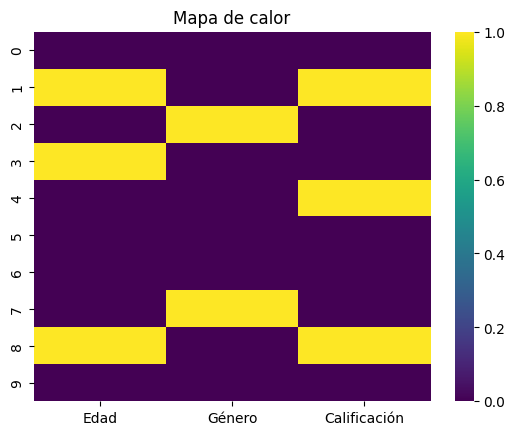

In [13]:
sns.heatmap(data=df.isnull(),cmap='viridis')
plt.title('Mapa de calor')
plt.show()

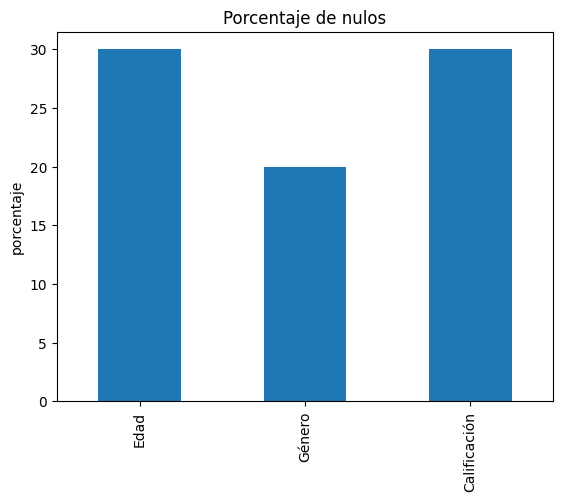

In [17]:
n_p=df.isnull().mean()*100
n_p
n_p.plot(kind='bar')
plt.title('Porcentaje de nulos')
plt.ylabel('porcentaje')
plt.show()

In [18]:
dfcopy=df.copy()#hacemos una copiua de df 
dfcopy=dfcopy.dropna(thresh=2).reset_index()##Borre o elimine los samples que tengan mas de 1 nulo con dfcopy.dropna(thresh=2) y reindex el indice

In [ ]:
mediana_edad=df.Edad.mean().astype(int) #encontramos los valores de la mediana y los remplazamos por los nulos
df.Edad=df.Edad.fillna(mediana_edad)    #Con el fillna se rrellenan los nulos
mediana_calificaciones=df.Calificación.median()
df.Calificación=df.Calificación.fillna(mediana_calificaciones)
df

,Edad,Género,Calificación
0,23.0,F,85.0
1,21.0,M,80.0
2,21.0,NaN,78.0
3,21.0,M,88.0
4,25.0,F,80.0
5,19.0,F,92.0
6,18.0,M,75.0
7,20.0,NaN,80.0
8,21.0,F,80.0
9,22.0,M,77.0


In [ ]:
dfcopy #este df no esta modificado por que es una copia del df original

,index,Edad,Género,Calificación
0,0,23.0,F,85.0
1,2,21.0,NaN,78.0
2,3,NaN,M,88.0
3,4,25.0,F,NaN
4,5,19.0,F,92.0
5,6,18.0,M,75.0
6,7,20.0,NaN,80.0
7,9,22.0,M,77.0


In [ ]:
dfcopy.Edad=dfcopy.Edad.ffill() #este es un after fill, se rellena con los datos de despues del dato nulo
dfcopy.Género=dfcopy.Género.bfill()# este es un before se rellena con los datos de antes del dato nulo
dfcopy

,index,Edad,Género,Calificación
0,0,23.0,F,85.0
1,2,21.0,M,78.0
2,3,21.0,M,88.0
3,4,25.0,F,NaN
4,5,19.0,F,92.0
5,6,18.0,M,75.0
6,7,20.0,M,80.0
7,9,22.0,M,77.0


In [ ]:
from sklearn.impute import SimpleImputer # usamos MICE (Multiple Imputation by Chained Equations)
#imputar por SimpleImputer
#Emplea algoritmos como árboles de decisión o regresión para imputar valores basándose en otras características del dataset

imputer = SimpleImputer(strategy="mean")
df[["Edad"]] = imputer.fit_transform(df[["Edad"]])
df

,Edad,Género,Calificación
0,23.0,F,85.0
1,21.0,M,80.0
2,21.0,NaN,78.0
3,21.0,M,88.0
4,25.0,F,80.0
5,19.0,F,92.0
6,18.0,M,75.0
7,20.0,NaN,80.0
8,21.0,F,80.0
9,22.0,M,77.0
